In [ ]:
# !pip install pandas_profiling --upgrade
# !pip install git+https://github.com/alberanid/imdbpy

In [ ]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
path = '/content/drive/MyDrive/Files/'

df_movies = pd.read_csv(path + 'movies.csv')

df_movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [ ]:
# profile = ProfileReport(df_movies)
# profile

In [ ]:
df_movies = df_movies.drop(['Unnamed: 0', 'Type'], axis = 1)
df_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (5, 5))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  16744
No of Coloums :  15
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
**************************************************
Missing Values : 
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Directors            726
Genres               275
C

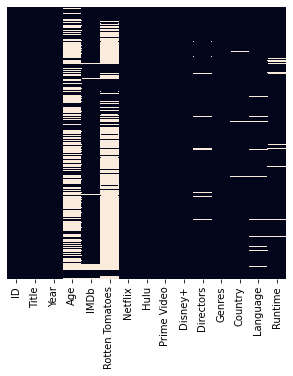

In [ ]:
data_investigate(df_movies)

In [ ]:
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_movies.fillna({'IMDb' : df_movies['IMDb'].mean()}, inplace = True)
df_movies.fillna({'IMDb' : df_movies['IMDb'].median()}, inplace = True)
# df_movies.loc[data['Age'].isnull() & data['Disney+'] == 1, "Age"] = 13
# df_movies.fillna({'Age' : 18}, inplace = True)
df_movies.fillna({'Age' : 'NR'}, inplace = True)
df_movies['Age'].replace({'18+': 18}, inplace = True)
df_movies['Age'].replace({'7+': 7}, inplace = True)
df_movies['Age'].replace({'13+': 13}, inplace = True)
df_movies['Age'].replace({'all': 0}, inplace = True)
df_movies['Age'].replace({'16+': 16}, inplace = True)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].mean()}, inplace = True)
df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].median()}, inplace = True)
# df_movies.fillna({'Directors' : "NA"}, inplace = True)
# df_movies.fillna({'Genres': "NA"}, inplace = True)
# df_movies.fillna({'Country': "NA"}, inplace = True)
# df_movies.fillna({'Language': "NA"}, inplace = True)
df_movies.fillna({'Runtime' : df_movies['Runtime'].mean()}, inplace = True)
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].astype(int)
df_movies['Runtime'] = df_movies['Runtime'].astype(int)

In [ ]:
df_movies.dropna(how = 'any', inplace = True)
df_movies.drop_duplicates(inplace = True)
df_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13,8.8,87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148
1,2,The Matrix,1999,18,8.7,87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136
2,3,Avengers: Infinity War,2018,13,8.5,84,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149
3,4,Back to the Future,1985,7,8.5,96,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,97,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161


No of Rows :  15677
No of Coloums :  15
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes      int64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Directors           object
Genres              object
Country             object
Language            object
Runtime              int64
dtype: object
**************************************************
Missing Values : 
Series([], dtype: int64)
**************************************************
Missing vaules %age wise :

ID                 0.0

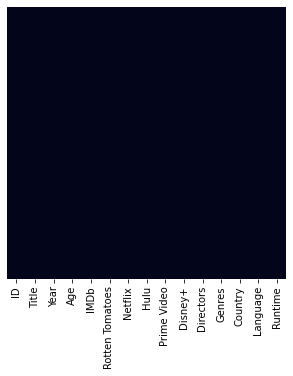

In [ ]:
data_investigate(df_movies)

In [ ]:
df_movies.describe()

,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
count,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000
mean,8304.398227,2002.627097,5.901741,69.162404,0.209670,0.054730,0.738853,0.035147,94.210946
std,4798.401584,20.853659,1.330829,15.294841,0.407086,0.227459,0.439274,0.184157,24.453777
min,1.000000,1902.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4215.000000,2000.000000,5.100000,71.000000,0.000000,0.000000,0.000000,0.000000,84.000000
50%,8290.000000,2012.000000,6.100000,71.000000,0.000000,0.000000,1.000000,0.000000,92.000000
75%,12434.000000,2016.000000,6.900000,71.000000,0.000000,0.000000,1.000000,0.000000,104.000000
max,16744.000000,2020.000000,9.300000,100.000000,1.000000,1.000000,1.000000,1.000000,328.000000


In [ ]:
# df_movies.sort_values('Year', ascending = True)
# df_movies.sort_values('IMDb', ascending = False)

In [ ]:
# df_movies.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_movies.csv', index = False)

# path = '/content/drive/MyDrive/Files/'

# udf_movies = pd.read_csv(path + 'updated_movies.csv')

# udf_movies

In [ ]:
# Platforms
netflix_title_count = len(df_movies[df_movies['Netflix'] == 1])
hulu_title_count = len(df_movies[df_movies['Hulu'] == 1])
prime_video_title_count = len(df_movies[df_movies['Prime Video'] == 1])
disney_title_count = len(df_movies[df_movies['Disney+'] == 1])

Platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

Count = [netflix_title_count, hulu_title_count, prime_video_title_count, disney_title_count]

fig = px.pie(names = Platform, values = Count, title = 'Movie Count Of Different Platforms', color_discrete_sequence = px.colors.sequential.Teal)

fig.update_traces(textposition = 'inside', textinfo = 'percent + label')

fig.show()

In [ ]:
print(f'''
      Total '{df_movies['Netflix'].sum()}' Titles are available on 'Netflix'
      Total '{df_movies['Hulu'].sum()}' Titles are available on 'Hulu'
      Total '{df_movies['Prime Video'].sum()}' Titles are available on 'Prime video'
      Total '{df_movies['Disney+'].sum()}' Titles are available on 'Disney+'
      ''')



      Total '3287' Titles are available on 'Netflix'
      Total '858' Titles are available on 'Hulu'
      Total '11583' Titles are available on 'Prime video'
      Total '551' Titles are available on 'Disney+'
      


In [ ]:
df_movies['OTT_Count'] = df_movies['Netflix'] + df_movies['Hulu'] + df_movies['Prime Video'] + df_movies['Disney+']

(df_movies['OTT_Count'].value_counts()/df_movies.shape[0])*100

1    96.217389
2     3.725203
3     0.057409
Name: OTT_Count, dtype: float64

In [ ]:
print(f'''
      Total '{df_movies[df_movies['OTT_Count'] == 4].shape[0]}' Titles are available on All Platforms
      Total '{df_movies[df_movies['OTT_Count'] == 3].shape[0]}' Titles are available on at least 3 Platforms
      Total '{df_movies[df_movies['OTT_Count'] == 2].shape[0]}' Titles are available on at least 2 Platforms
      Total '{df_movies[df_movies['OTT_Count'] == 1].shape[0]}' Titles are available on at least 1 Platforms
      ''')


      Total '0' Titles are available on All Platforms
      Total '9' Titles are available on at least 3 Platforms
      Total '584' Titles are available on at least 2 Platforms
      Total '15084' Titles are available on at least 1 Platforms
      


In [ ]:
# Movies Available on All Platforms
# df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 1) & (df_movies['Disney+'] == 1)]
print('\nTotal ', df_movies[df_movies['OTT_Count'] == 4].shape[0], ' Titles are available on All Platforms\n')
ott4 = df_movies[df_movies['OTT_Count'] == 4]
ott4


Total  0  Titles are available on All Platforms



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count


In [ ]:
print('\nTotal ', df_movies[df_movies['OTT_Count'] == 3].shape[0], ' Titles are available on at least 3 Platforms\n')
ott3 = df_movies[df_movies['OTT_Count'] == 3]
ott3


Total  9  Titles are available on at least 3 Platforms



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
148,149,The Square,2013,NR,8.1,100,1,1,1,0,Ruben Östlund,"Comedy,Drama","Sweden,Germany,France,Denmark,United States","Swedish,English,Danish",151,3
340,341,The Interview,2014,18,6.5,52,1,1,1,0,"Evan Goldberg,Seth Rogen","Action,Adventure,Comedy",United States,"English,Korean",112,3
497,498,Blame!,2017,13,6.7,82,1,1,1,0,Hiroyuki Seshita,"Animation,Action,Drama,Sci-Fi,Thriller",Japan,Japanese,106,3
610,611,Evolution,2001,13,6.1,43,1,1,1,0,Ivan Reitman,"Comedy,Sci-Fi",United States,English,101,3
1133,1134,No Game No Life: Zero,2017,13,7.5,71,1,1,1,0,Atsuko Ishizuka,"Animation,Adventure,Comedy,Drama,Fantasy,Romance",Japan,Japanese,110,3
1776,1777,Zapped,2014,0,5.1,71,1,1,0,1,Peter DeLuise,"Comedy,Family,Fantasy","Canada,United States",English,102,3
2017,2018,Mother,2016,NR,5.6,71,1,1,1,0,Darren Aronofsky,"Drama,Horror,Mystery",United States,English,121,3
3960,3961,The Kid,2019,18,5.9,45,0,1,1,1,Vincent D'Onofrio,"Biography,Drama,Western",United States,English,100,3
4313,4314,Inside Out,2011,13,4.5,25,0,1,1,1,"Pete Docter,Ronnie Del Carmen","Animation,Adventure,Comedy,Drama,Family,Fantasy",United States,English,95,3


In [ ]:
print('\nTotal ', df_movies[df_movies['OTT_Count'] == 2].shape[0], ' Titles are available on at least 2 Platforms\n')
ott2 = df_movies[df_movies['OTT_Count'] == 2]
ott2


Total  584  Titles are available on at least 2 Platforms



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,97,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,2
6,7,The Pianist,2002,18,8.5,95,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150,2
11,12,3 Idiots,2009,13,8.4,100,1,0,1,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170,2
15,16,Once Upon a Time in the West,1968,13,8.5,95,1,0,1,0,Sergio Leone,Western,"Italy,United States","Italian,English,Spanish",165,2
31,32,Drive,2011,18,7.8,92,1,0,1,0,Nicolas Winding Refn,"Crime,Drama",United States,"English,Spanish",100,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,9329,The Prince and the Pauper,2000,7,6.5,71,0,0,1,1,Don Chaffey,Adventure,United Kingdom,English,93,2
9802,9803,"20,000 Leagues Under the Sea",1997,NR,5.0,71,0,0,1,1,Richard Fleischer,"Adventure,Drama,Family,Fantasy,Sci-Fi",United States,English,127,2
10102,10103,Bears,2001,NR,7.3,71,0,0,1,1,"Aaron Blaise,Robert Walker","Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Inuktitut,Croatian,Serbian",85,2
11538,11539,The Swap,1979,18,3.4,71,0,0,1,1,Jay Karas,"Comedy,Family,Fantasy",United States,English,100,2


In [ ]:
print('\nTotal ', df_movies[df_movies['OTT_Count'] == 1].shape[0], ' Titles are available on at least 1 Platforms\n')
ott1 = df_movies[df_movies['OTT_Count'] == 1]
ott1


Total  15084  Titles are available on at least 1 Platforms



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
0,1,Inception,2010,13,8.8,87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,1
1,2,The Matrix,1999,18,8.7,87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,1
2,3,Avengers: Infinity War,2018,13,8.5,84,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,1
3,4,Back to the Future,1985,7,8.5,96,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,1
5,6,Spider-Man: Into the Spider-Verse,2018,7,8.4,97,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NR,6.2,71,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120,1
16740,16741,The Poof Point,2001,7,4.7,71,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90,1
16741,16742,Sharks of Lost Island,2013,NR,5.7,71,0,0,0,1,Neil Gelinas,Documentary,United States,English,93,1
16742,16743,Man Among Cheetahs,2017,NR,6.6,71,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,93,1


In [ ]:
df_movies_title = df_movies['Title']
movie_titles_w = " ".join(df_movies_title)

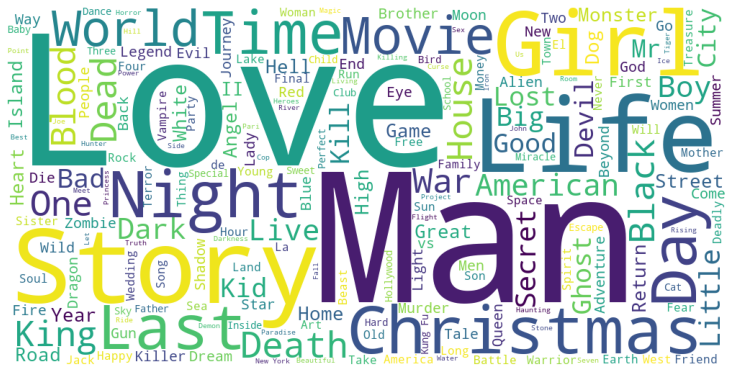

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(movie_titles_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
print(f'''
      Total '{df_movies['Year'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see from past '{df_movies['Year'].unique().shape[0]}' Years, They were Like this,\n

{df_movies.sort_values(by = 'Year', ascending = True)['Year'].unique()}\n

      The Oldest Movie is Available is from '{df_movies['Year'].min()}' &\n
      The Latest Movie is Available is from '{df_movies['Year'].max()}'
      ''')


      Total '15677' Titles are available on All Platforms, out of which

      You Can Choose to see from past '107' Years, They were Like this,


[1902 1912 1913 1915 1916 1918 1919 1920 1921 1922 1923 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020]


      The Oldest Movie is Available is from '1902' &

      The Latest Movie is Available is from '2020'
      


In [ ]:
oldest_movies = df_movies.sort_values(by = 'Year', ascending = True)
oldest_movies.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
4467,4468,A Trip to the Moon,1902,0,8.2,100,0,0,1,0,Georges Méliès,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi",France,"None,French",13,1
8795,8796,From the Manger to the Cross,1912,7,5.7,71,0,0,1,0,Sidney Olcott,"Biography,Drama",United States,English,60,1
9917,9918,Fatty Joins the Force,1913,NR,5.3,71,0,0,1,0,George Nichols,"Comedy,Short",United States,English,12,1
10170,10171,The Speed Kings,1913,NR,5.0,71,0,0,1,0,Wilfred Lucas,"Short,Action,Comedy",United States,English,8,1
11524,11525,Her Painted Hero,1915,NR,4.7,71,0,0,1,0,F. Richard Jones,"Comedy,Short",United States,English,21,1


In [ ]:
latest_movies = df_movies.sort_values(by = 'Year', ascending = False)
latest_movies.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
8147,8148,Captured,2020,NR,5.4,71,0,0,1,0,Ted Kotcheff,"Drama,Romance","Canada,United States",English,110,1
16548,16549,The Disney Family Singalong,2020,0,8.1,71,0,0,0,1,Hamish Hamilton,"Family,Musical",United States,English,93,1
1073,1074,Dangerous Lies,2020,16,5.2,71,1,0,0,0,Michael M. Scott,"Drama,Mystery,Thriller",United States,English,96,1
5772,5773,Sufna,2020,NR,8.2,71,0,0,1,0,Jagdeep Sidhu,Romance,India,Punjabi,144,1
8445,8446,The Bet,2020,NR,3.0,71,0,0,1,0,Joan Carr-Wiggin,Comedy,"Canada,United Kingdom",English,93,1


In [ ]:
year_count = df_movies.groupby('Year')['Title'].count()
year_movie = df_movies.groupby('Year')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
year_data_movies = pd.concat([year_count, year_movie], axis = 1).reset_index().rename(columns = {'Title' : 'Movie Count'})
year_data_movies = year_data_movies.sort_values(by = 'Movie Count', ascending = False)

In [ ]:
# Highest Movies Count per Year - All Platforms Combined
year_data_movies.head(10)

,Year,Movie Count,Netflix,Hulu,Prime Video,Disney+
103,2017,1296,533,121,696,19
104,2018,1148,503,150,550,15
102,2016,1104,409,56,666,17
101,2015,995,254,60,711,9
99,2013,908,125,42,768,10
100,2014,904,162,44,715,11
98,2012,792,105,37,668,15
105,2019,611,368,97,157,23
97,2011,603,84,30,500,19
95,2009,520,68,24,431,13


In [ ]:
# Highest Movies Count per Year - Netflix
netflix_year_data_movies = year_data_movies.sort_values(by = 'Netflix', ascending = False)
netflix_year_data_movies.head(5)

,Year,Movie Count,Netflix,Hulu,Prime Video,Disney+
103,2017,1296,533,121,696,19
104,2018,1148,503,150,550,15
102,2016,1104,409,56,666,17
105,2019,611,368,97,157,23
101,2015,995,254,60,711,9


In [ ]:
# Highest Movies Count per Year - Hulu
hulu_year_data_movies = year_data_movies.sort_values(by = 'Hulu', ascending = False)
hulu_year_data_movies.head(5)

,Year,Movie Count,Netflix,Hulu,Prime Video,Disney+
104,2018,1148,503,150,550,15
103,2017,1296,533,121,696,19
105,2019,611,368,97,157,23
101,2015,995,254,60,711,9
102,2016,1104,409,56,666,17


In [ ]:
# Highest Movies Count per Year - Prime Video
prime_video_year_data_movies = year_data_movies.sort_values(by = 'Prime Video', ascending = False)
prime_video_year_data_movies.head(5)

,Year,Movie Count,Netflix,Hulu,Prime Video,Disney+
99,2013,908,125,42,768,10
100,2014,904,162,44,715,11
101,2015,995,254,60,711,9
103,2017,1296,533,121,696,19
98,2012,792,105,37,668,15


In [ ]:
# Highest Movies Count per Year - Disney+
disney_year_data_movies = year_data_movies.sort_values(by = 'Disney+', ascending = False)
disney_year_data_movies.head(5)

,Year,Movie Count,Netflix,Hulu,Prime Video,Disney+
89,2003,202,30,6,146,25
105,2019,611,368,97,157,23
86,2000,162,18,6,121,21
88,2002,183,19,9,142,20
90,2004,207,25,6,164,20


In [ ]:
fig = px.bar(year_data_movies[:50], x = 'Year', y = 'Movie Count', color = 'Movie Count', color_continuous_scale = 'Blues_r')
fig.show()

In [ ]:
fig = px.histogram(df_movies, x = 'Year', y = 'Title')
fig.show()

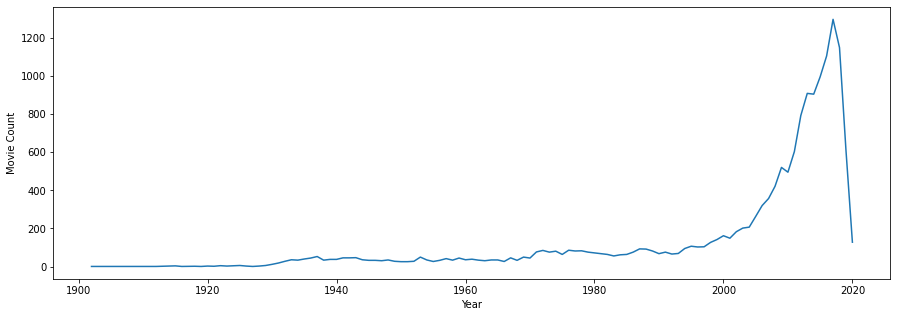

In [ ]:
fig = plt.figure(figsize = (15, 5))
sns.lineplot(data = year_data_movies, x = 'Year', y = 'Movie Count')
plt.show()

In [ ]:
#Best movie every year
best_movie_year = df_movies.sort_values('IMDb', ascending = False).groupby('Year').first().reset_index()

fig = px.scatter(best_movie_year, x = 'Year', y = 'IMDb', hover_data = ['Title', 'Runtime', 'Genres', 'Language'], 
                 color_continuous_scale = 'Blues',color = 'IMDb', size = 'IMDb',
                 title = 'Best Movie Each Year According to IMDB Rating')
fig.show()

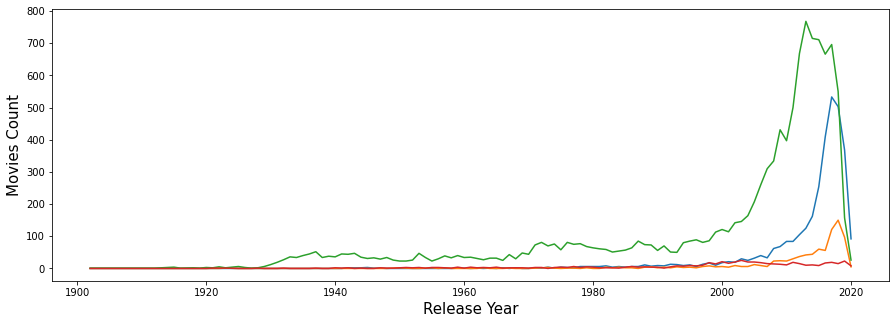

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Netflix'])
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Hulu'])
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Prime Video'])
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Disney+'])
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

In [ ]:
df_netflix_movies = df_movies.loc[(df_movies['Netflix'] > 0)]
df_hulu_movies = df_movies.loc[(df_movies['Hulu'] > 0)]
df_prime_video_movies = df_movies.loc[(df_movies['Prime Video'] > 0)]
df_disney_movies = df_movies.loc[(df_movies['Disney+'] > 0)]

In [ ]:
df_netflix_only_movies = df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_hulu_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_prime_video_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 1 ) & (df_movies['Disney+'] == 0)]
df_disney_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 1)]

In [ ]:
print(f'''
      Lets Talk about, 'All Platforms'
      
      Total '{df_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on All Platforms & They are '{df_movies['Age'].unique()}'\n
      Total '{df_movies[df_movies['Age'] == 'NR'].shape[0]}' Movies are available on All Platforms Which are 'Not Rated' Yet\n
      Total '{df_movies[df_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on All Platforms\n
      Total '{df_movies[df_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on All Platforms\n
      Total '{df_movies[df_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on All Platforms\n
      Total '{df_movies[df_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on All Platforms\n
      Total '{df_movies[df_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on All Platforms\n
      ''')


      Lets Talk about, 'All Platforms'
      
      Total '6' Rating as per 'Age' Categories are available on All Platforms & They are '[13 18 7 'NR' 0 16]'

      Total '8584' Movies are available on All Platforms Which are 'Not Rated' Yet

      Total '799' Movies are available for 'All' Audience on All Platforms

      Total '1403' Movies are available Only for '7+' Audience on All Platforms

      Total '1205' Movies are available Only for '13+' Audience on All Platforms

      Total '308' Movies are available Only for '16+' Audience on All Platforms

      Total '3378' Movies are available Only for '18+' Audience on All Platforms

      


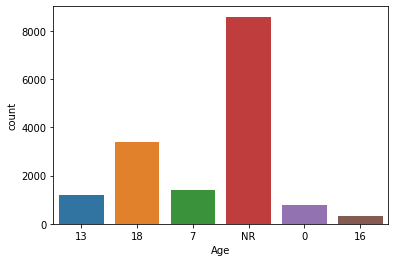

In [ ]:
sns.countplot(df_movies['Age'])
plt.show()

In [ ]:
print(f'''
      Lets Talk about, 'Netflix'
      
      Total '{df_netflix_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Netflix' & They are '{df_netflix_movies['Age'].unique()}'\n
      Total '{df_netflix_movies[df_netflix_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Netflix' Which are 'Not Rated' Yet\n
      Total '{df_netflix_movies[df_netflix_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Netflix'\n
      Total '{df_netflix_movies[df_netflix_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Netflix'\n
      Total '{df_netflix_movies[df_netflix_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Netflix'\n
      Total '{df_netflix_movies[df_netflix_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Netflix'\n
      Total '{df_netflix_movies[df_netflix_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Netflix'\n
      ''')


      Lets Talk about, 'Netflix'
      
      Total '6' Rating as per 'Age' Categories are available on 'Netflix' & They are '[13 18 7 'NR' 0 16]'

      Total '1669' Movies are available on 'Netflix' Which are 'Not Rated' Yet

      Total '120' Movies are available for 'All' Audience on 'Netflix'

      Total '309' Movies are available Only for '7+' Audience on 'Netflix'

      Total '373' Movies are available Only for '13+' Audience on 'Netflix'

      Total '87' Movies are available Only for '16+' Audience on 'Netflix'

      Total '729' Movies are available Only for '18+' Audience on 'Netflix'

      


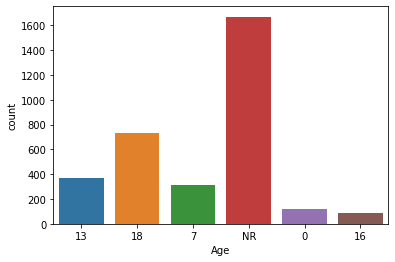

In [ ]:
sns.countplot(df_netflix_movies['Age'])
plt.show()

In [ ]:
print(f'''
      Lets Talk about, 'Hulu'
      
      Total '{df_hulu_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Hulu' & They are '{df_hulu_movies['Age'].unique()}'\n
      Total '{df_hulu_movies[df_hulu_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Hulu' Which are 'Not Rated' Yet\n
      Total '{df_hulu_movies[df_hulu_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Hulu'\n
      Total '{df_hulu_movies[df_hulu_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Hulu'\n
      Total '{df_hulu_movies[df_hulu_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Hulu'\n
      Total '{df_hulu_movies[df_hulu_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Hulu'\n
      Total '{df_hulu_movies[df_hulu_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Hulu'\n
      ''')


      Lets Talk about, 'Hulu'
      
      Total '6' Rating as per 'Age' Categories are available on 'Hulu' & They are '[13 7 18 'NR' 0 16]'

      Total '289' Movies are available on 'Hulu' Which are 'Not Rated' Yet

      Total '47' Movies are available for 'All' Audience on 'Hulu'

      Total '107' Movies are available Only for '7+' Audience on 'Hulu'

      Total '114' Movies are available Only for '13+' Audience on 'Hulu'

      Total '16' Movies are available Only for '16+' Audience on 'Hulu'

      Total '285' Movies are available Only for '18+' Audience on 'Hulu'

      


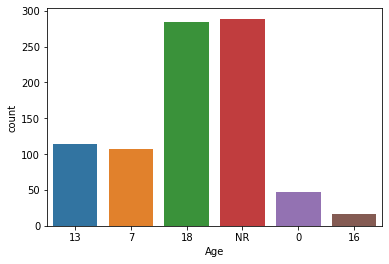

In [ ]:
sns.countplot(df_hulu_movies['Age'])
plt.show()

In [ ]:
print(f'''
      Lets Talk about, 'Prime Video'
      
      Total '{df_prime_video_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Prime Video' & They are '{df_prime_video_movies['Age'].unique()}'\n
      Total '{df_prime_video_movies[df_prime_video_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Prime Video' Which are 'Not Rated' Yet\n
      Total '{df_prime_video_movies[df_prime_video_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Prime Video'\n
      Total '{df_prime_video_movies[df_prime_video_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Prime Video'\n
      Total '{df_prime_video_movies[df_prime_video_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Prime Video'\n
      Total '{df_prime_video_movies[df_prime_video_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Prime Video'\n
      Total '{df_prime_video_movies[df_prime_video_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Prime Video'\n
      ''')


      Lets Talk about, 'Prime Video'
      
      Total '6' Rating as per 'Age' Categories are available on 'Prime Video' & They are '[18 13 'NR' 7 0 16]'

      Total '6788' Movies are available on 'Prime Video' Which are 'Not Rated' Yet

      Total '382' Movies are available for 'All' Audience on 'Prime Video'

      Total '874' Movies are available Only for '7+' Audience on 'Prime Video'

      Total '783' Movies are available Only for '13+' Audience on 'Prime Video'

      Total '217' Movies are available Only for '16+' Audience on 'Prime Video'

      Total '2539' Movies are available Only for '18+' Audience on 'Prime Video'

      


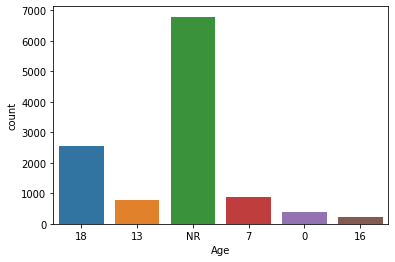

In [ ]:
sns.countplot(df_prime_video_movies['Age'])
plt.show()

In [ ]:
print(f'''
      Lets Talk about, 'Disney+'
      
      Total '{df_disney_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Disney+' & They are '{df_disney_movies['Age'].unique()}'\n
      Total '{df_disney_movies[df_disney_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Disney+' Which are 'Not Rated' Yet\n
      Total '{df_disney_movies[df_disney_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Disney+'\n
      Total '{df_disney_movies[df_disney_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Disney+'\n
      Total '{df_disney_movies[df_disney_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Disney+'\n
      Total '{df_disney_movies[df_disney_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Disney+'\n
      Total '{df_disney_movies[df_disney_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Disney+'\n
      ''')


      Lets Talk about, 'Disney+'
      
      Total '6' Rating as per 'Age' Categories are available on 'Disney+' & They are '[13 7 0 'NR' 18 16]'

      Total '60' Movies are available on 'Disney+' Which are 'Not Rated' Yet

      Total '273' Movies are available for 'All' Audience on 'Disney+'

      Total '176' Movies are available Only for '7+' Audience on 'Disney+'

      Total '39' Movies are available Only for '13+' Audience on 'Disney+'

      Total '1' Movies are available Only for '16+' Audience on 'Disney+'

      Total '2' Movies are available Only for '18+' Audience on 'Disney+'

      


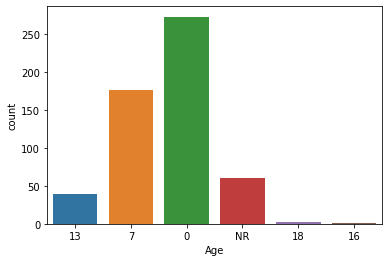

In [ ]:
sns.countplot(df_disney_movies['Age'])
plt.show()

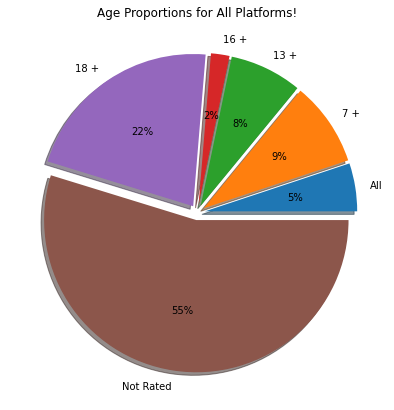

In [ ]:
age_all_movies = df_movies.groupby('Age').count()['ID'].reset_index()
age_all_movies.columns = ['Age', 'Count']
labels = ['All', '7 +', '13 +', '16 +', '18 +', 'Not Rated']
plt.figure(figsize = (7, 7))
plt.pie(age_all['Count'], labels = labels, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.0f%%', labeldistance = 1.1, shadow = True)
plt.title('Age Proportions for All Platforms!')
plt.show()

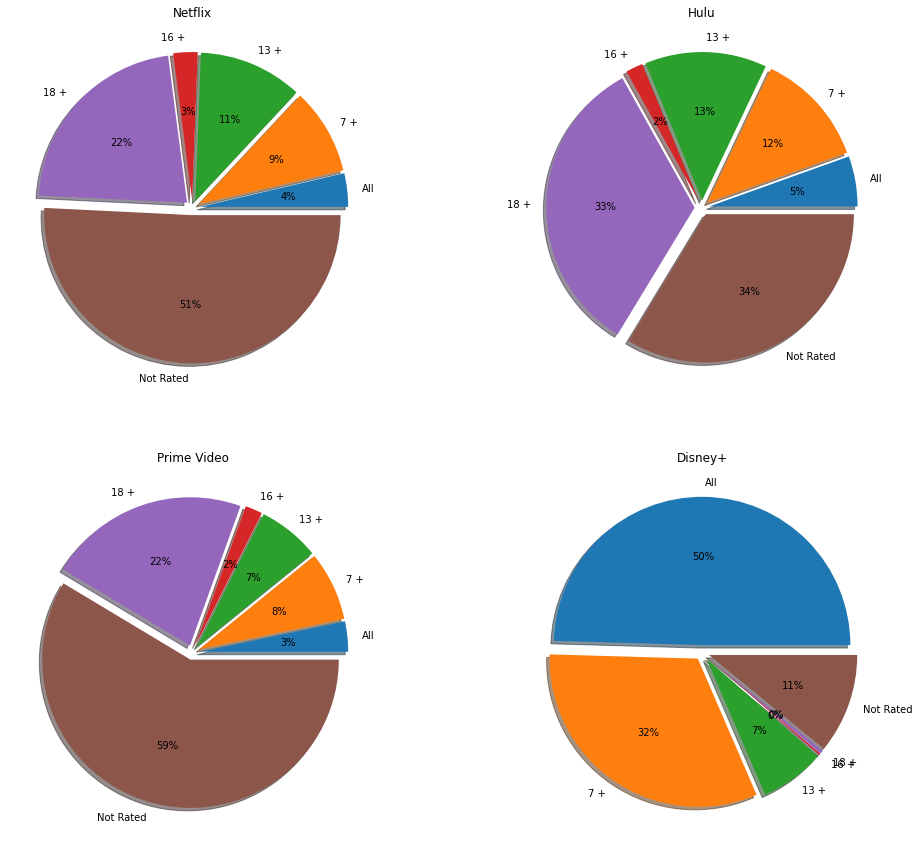

In [ ]:
fig = plt.figure(figsize = (35, 15))

age_netflix_movies = df_movies[df_movies.Netflix  == 1].groupby(['Age', 'Netflix']).count()['ID'].reset_index()[['Age', 'ID']]
age_hulu_movies = df_movies[df_movies.Hulu  == 1].groupby(['Age', 'Hulu']).count()['ID'].reset_index()[['Age', 'ID']]
age_prime_movies = df_movies[df_movies['Prime Video']  == 1].groupby(['Age', 'Prime Video']).count()['ID'].reset_index()[['Age', 'ID']]
age_disney_movies = df_movies[df_movies['Disney+']  == 1].groupby(['Age', 'Disney+']).count()['ID'].reset_index()[['Age', 'ID']]

labels = ['All', '7 +', '13 +', '16 +', '18 +', 'Not Rated']

ax = plt.subplot2grid((2, 4), (0, 0))

plt.pie(age_netflix_movies['ID'], labels = labels, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)

plt.title('Netflix')

ax = plt.subplot2grid((2, 4), (0, 1))

plt.pie(age_hulu_movies['ID'], labels = labels, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)

plt.title('Hulu')

ax = plt.subplot2grid((2, 4), (1, 0))
plt.pie(age_prime_movies['ID'], labels = labels, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)

plt.title('Prime Video')

ax = plt.subplot2grid((2, 4), (1, 1))

plt.pie(age_disney_movies['ID'], labels = labels, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)

plt.title('Disney+')

plt.show()

In [ ]:
df_imdb_high_movies = df_movies.sort_values(by = 'IMDb', ascending = False).reset_index()
df_imdb_high_movies = df_imdb_high_movies.drop(['index'], axis = 1)
# filter =(df_movies['IMDb'] == (df_movies['IMDb'].max()))
# df_imdb_high_movies = df_movies[filter]

# highest_rated_movie = df_movies.loc[df_movies['IMDb'].idxmax()]

print('\nHighest Ever IMDb Movies are : \n')
df_imdb_high_movies.head(5)


Highest Ever IMDb Movies are : 



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
0,7221,"Down, But Not Out!",2015,NR,9.3,71,0,0,1,0,Miguel Gaudêncio,"Documentary,Sport",Poland,Polish,68,1
1,6567,Square One,2019,NR,9.3,71,0,0,1,0,Danny Wu,"Documentary,Drama,Music",United States,English,83,1
2,6838,Steven Banks: Home Entertainment Center,1989,NR,9.3,71,0,0,1,0,Tom McLoughlin,Comedy,United States,English,60,1
3,7427,Bounty,2011,NR,9.3,71,0,0,1,0,Roger Donaldson,"Adventure,Drama,History,Romance","United Kingdom,United States,New Zealand",English,132,1
4,948,Natsamrat,2016,NR,9.1,71,1,0,0,0,Mahesh Manjrekar,"Drama,Family",India,Marathi,166,1


In [ ]:
df_imdb_low_movies = df_movies.sort_values(by = 'IMDb', ascending = True).reset_index()
df_imdb_low_movies = df_imdb_low_movies.drop(['index'], axis = 1)
# filter = (df_movies['IMDb'] == (df_movies['IMDb'].min()))
# df_imdb_low_movies = df_movies[filter]

print('\nLowest Ever IMDb Movies are : \n')
df_imdb_low_movies.head(5)


Lowest Ever IMDb Movies are : 



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,OTT_Count
0,13814,In Memoriam Alexander Litvinenko,2007,NR,0.0,71,0,0,1,0,Jos de Putter,Documentary,Netherlands,English,55,1
1,13822,From Philadelphia To Fallujah,2011,NR,0.0,71,0,0,1,0,David Hammelburg,"Documentary,Short",United States,English,42,1
2,15377,Justin Bieber: Always Believing,2013,NR,1.0,71,0,0,1,0,Thomas Gibson,"Documentary,Music",United States,English,70,1
3,13682,Justin Bieber: Rise to Fame,2011,0,1.0,71,0,0,1,0,Maureen Goldthorpe,Documentary,United Kingdom,English,65,1
4,15072,Shark Exorcist,2016,NR,1.3,71,0,0,1,0,Donald Farmer,"Action,Comedy,Fantasy,Horror,Mystery,Sci-Fi,Th...",United States,English,71,1


In [ ]:
print(f'''
      Total '{df_movies['IMDb'].unique().shape[0]}' unique IMDb Ratings were Given, They were Like this,\n
      
{df_movies.sort_values(by = 'IMDb', ascending = False)['IMDb'].unique()}\n

      The Highest Ever IMDb Rating Ever Any Movie Got is '{df_imdb_high_movies['Title'][0]}' : '{df_imdb_high_movies['IMDb'].max()}'\n

      The Lowest Ever IMDb Rating Ever Any Movie Got is '{df_imdb_low_movies['Title'][0]}' : '{df_imdb_low_movies['IMDb'].min()}'\n
      ''')


      Total '82' unique IMDb Ratings were Given, They were Like this,

      
[9.3 9.1 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8.  7.9 7.8 7.7 7.6 7.5
 7.4 7.3 7.2 7.1 7.  6.9 6.8 6.7 6.6 6.5 6.4 6.3 6.2 6.1 6.  5.9 5.8 5.7
 5.6 5.5 5.4 5.3 5.2 5.1 5.  4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.  3.9
 3.8 3.7 3.6 3.5 3.4 3.3 3.2 3.1 3.  2.9 2.8 2.7 2.6 2.5 2.4 2.3 2.2 2.1
 2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3 1.  0. ]


      The Highest Ever IMDb Rating Ever Any Movie Got is 'Down, But Not Out!' : '9.3'


      The Lowest Ever IMDb Rating Ever Any Movie Got is 'In Memoriam Alexander Litvinenko' : '0.0'

      


In [ ]:
n_imdb_t_movie = df_imdb_high_movies.loc[df_imdb_high_movies['Netflix']==1][['Title','IMDb']].head(1).reset_index()
h_imdb_t_movie = df_imdb_high_movies.loc[df_imdb_high_movies['Hulu']==1][['Title','IMDb']].head(1).reset_index()
p_imdb_t_movie = df_imdb_high_movies.loc[df_imdb_high_movies['Prime Video']==1][['Title','IMDb']].head(1).reset_index()
d_imdb_t_movie = df_imdb_high_movies.loc[df_imdb_high_movies['Disney+']==1][['Title','IMDb']].head(1).reset_index()
for i in n_imdb_t_movie['Title'][0], h_imdb_t_movie['Title'][0], p_imdb_t_movie['Title'][0], d_imdb_t_movie['Title'][0]:
  print (i)

Natsamrat
The Dark Knight
Down, But Not Out!
Star Wars: The Empire Strikes Back


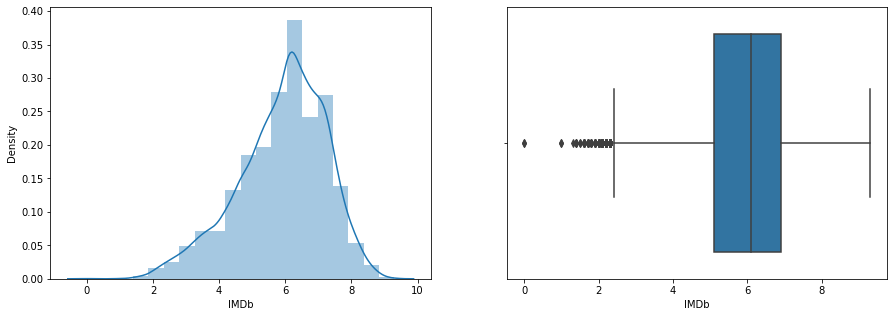

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(df_movies['IMDb'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies['IMDb'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms

netflix_imdb_movies = df_netflix_movies.loc[df_netflix_movies['IMDb'] > 0 ]
hulu_imdb_movies = df_hulu_movies.loc[df_hulu_movies['IMDb'] > 0 ]
prime_video_imdb_movies = df_prime_video_movies.loc[df_prime_video_movies['IMDb'] > 0 ]
disney_imdb_movies = df_disney_movies.loc[df_disney_movies['IMDb'] > 0 ]

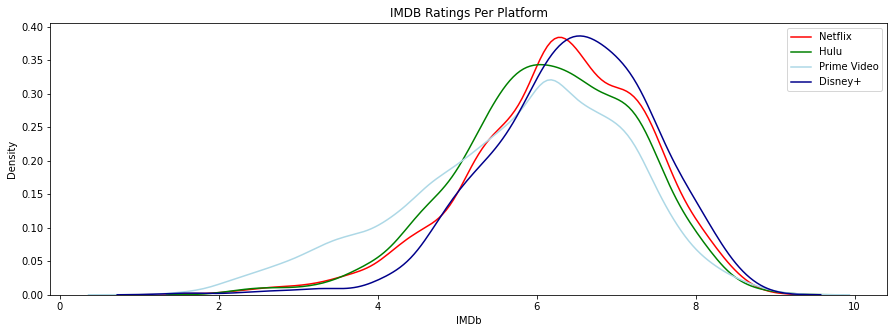

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15,5))
plt.title('IMDB Ratings Per Platform')

# Plotting the information from each dataset into a KDE plot
sns.kdeplot(data = netflix_imdb_movies['IMDb'], color = 'red',  legend = True)
sns.kdeplot(data = hulu_imdb_movies['IMDb'], color = 'green',  legend = True)
sns.kdeplot(data = prime_video_imdb_movies['IMDb'], color = 'lightblue', legend = True)
sns.kdeplot(data = disney_imdb_movies['IMDb'], color = 'darkblue', legend = True)

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

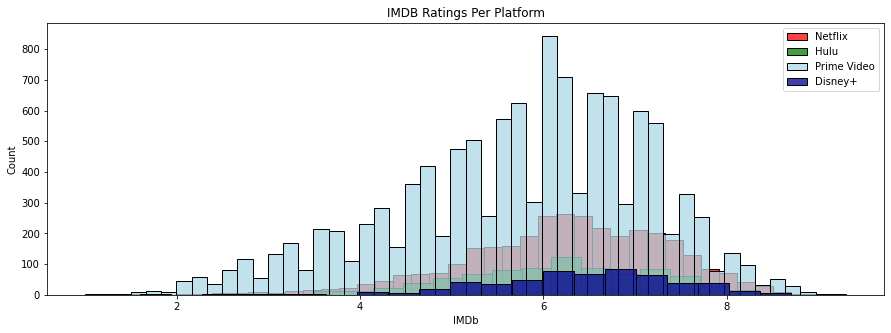

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('IMDB Ratings Per Platform')

# Plotting the information from each dataset into a histogram
sns.histplot(netflix_imdb_movies['IMDb'], color = 'red', legend = True, kde = False)
sns.histplot(hulu_imdb_movies['IMDb'], color = 'green', legend = True, kde = False)
sns.histplot(prime_video_imdb_movies['IMDb'], color = 'lightblue', legend = True, kde = False)
sns.histplot(disney_imdb_movies['IMDb'], color = 'darkblue', legend = True, kde = False)                                      
                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

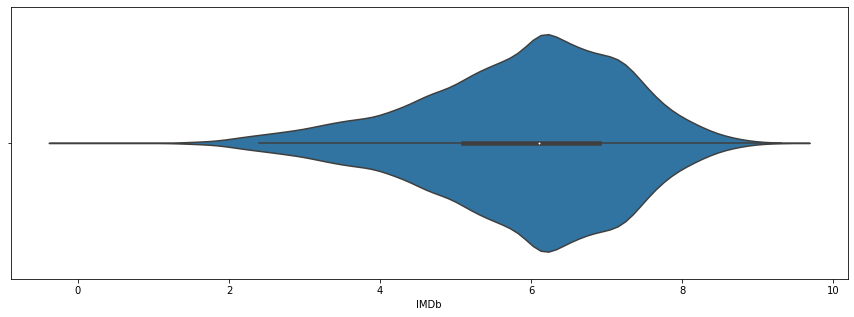

In [ ]:
# Distribution of movie rating in each platform
plt.figure(figsize = (15, 5))
sns.violinplot(x = df_movies['IMDb'])
plt.show()